In [1]:
import numpy as np
import statsmodels.api as sm
from ISLP.models import (ModelSpec as MS,summarize)
import matplotlib.pyplot as plt
import scipy as sc
import pandas as pd
import sklearn as sk
from sklearn.linear_model import LogisticRegression
import warnings
warnings.filterwarnings('ignore')

### Problem 1

#### (a)

In [2]:
def crossval(pred, response, k):
    split = pred.shape[0]//k
    mse_list = []
    for i in range(k):
        if i != max(range(k)):
            pred_val = pred[i*split:(i+1)*split,]
            y_val = response[i*split:(i+1)*split,]
            pred_train = np.concatenate((pred[:i*split,], pred[(i+1)*split:,]))
            y_train = np.concatenate((response[:i*split,], response[(i+1)*split:,]))
        else:
            pred_val = pred[i*split:,]
            y_val = response[i*split:,]
            pred_train = pred[:i*split,]
            y_train = response[:i*split,]
        results = sm.OLS(y_train, pred_train).fit()
        test_pred = results.predict(pred_val)
        mse = (np.mean((y_val - test_pred)**2))
        mse_list.append(mse)
    return np.mean(mse_list)

In [3]:
def holdoutval(pred, response, prop):
    split = int(np.floor(pred.shape[0]*prop))
    pred_val = pred[:split,]
    y_val = response[:split,]
    pred_train = pred[split:,]
    y_train = response[split:,]
    results = sm.OLS(y_train, pred_train).fit()
    test_pred = results.predict(pred_val)
    mse = (np.mean((y_val - test_pred)**2))
    return mse

In [4]:
np.random.seed(1)
x_train = np.random.normal(0, 1, 100)
x_test = np.random.normal(0, 1, 100)
error_train = np.random.normal(0, 1, 100)
error_test = np.random.normal(0, 1, 100)
y_train = 0.5 + 0.5*x_train - x_train**2 + x_train**3 + error_train
y_test = 0.5 + 0.5*x_test - x_test**2 + x_test**3 + error_test

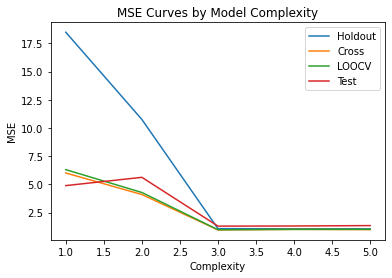

[18.484858373064238, 10.755278170209266, 1.0776227378608376, 1.0696065316356853, 1.065100542536326]
[6.011072122608808, 4.102682693846942, 0.9665804783061592, 1.0121748682033727, 0.9927246255264761]
[6.307525396329753, 4.28404222767816, 0.9817568247235389, 1.0161707331941565, 1.0187175201905636]


In [6]:
xp_train = x_train
xp_test = x_test
xp_train = sm.add_constant(xp_train)
xp_test = sm.add_constant(xp_test)
complexity = [1, 2, 3, 4, 5]
hold_val_mse = []
cross_val_mse = []
loocv_val_mse = []
test_mse = []

for degree in range(1, 6):
    if degree != 1:
        new_col = x_train**degree
        new_col = new_col[:,None]
        new_col2 = x_test**degree
        new_col2 = new_col2[:,None]
        xp_train = np.concatenate((xp_train, new_col), axis=1)
        xp_test = np.concatenate((xp_test, new_col2), axis=1)
    hold_val_mse.append(holdoutval(xp_train, y_train, 0.2))
    cross_val_mse.append(crossval(xp_train, y_train, 10))
    loocv_val_mse.append(crossval(xp_train, y_train, y_train.shape[0]))
    results = sm.OLS(y_train, xp_train).fit()
    test_pred = results.predict(xp_test)
    test_mse.append(np.mean((y_test - test_pred)**2))
plt.plot(complexity, hold_val_mse, label = 'Holdout')
plt.plot(complexity, cross_val_mse, label = 'Cross')
plt.plot(complexity, loocv_val_mse, label = 'LOOCV')
plt.plot(complexity, test_mse, label = 'Test')
plt.title('MSE Curves by Model Complexity')
plt.xlabel('Complexity')
plt.ylabel('MSE')
plt.legend()
plt.show()
print(hold_val_mse)
print(cross_val_mse)
print(loocv_val_mse)

#### (c)

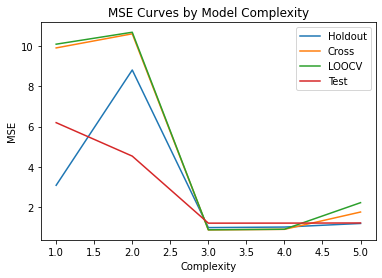

In [7]:
np.random.seed(5)
x_train = np.random.normal(0, 1, 100)
x_test = np.random.normal(0, 1, 100)
error_train = np.random.normal(0, 1, 100)
error_test = np.random.normal(0, 1, 100)
y_train = 0.5 + 0.5*x_train - x_train**2 + x_train**3 + error_train
y_test = 0.5 + 0.5*x_test - x_test**2 + x_test**3 + error_test
xp_train = x_train
xp_test = x_test
xp_train = sm.add_constant(xp_train)
xp_test = sm.add_constant(xp_test)
complexity = [1, 2, 3, 4, 5]
hold_val_mse = []
cross_val_mse = []
loocv_val_mse = []
test_mse = []

for degree in range(1, 6):
    if degree != 1:
        new_col = x_train**degree
        new_col = new_col[:,None]
        new_col2 = x_test**degree
        new_col2 = new_col2[:,None]
        xp_train = np.concatenate((xp_train, new_col), axis=1)
        xp_test = np.concatenate((xp_test, new_col2), axis=1)
    hold_val_mse.append(holdoutval(xp_train, y_train, 0.2))
    cross_val_mse.append(crossval(xp_train, y_train, 10))
    loocv_val_mse.append(crossval(xp_train, y_train, y_train.shape[0]))
    results = sm.OLS(y_train, xp_train).fit()
    test_pred = results.predict(xp_test)
    test_mse.append(np.mean((y_test - test_pred)**2))
plt.plot(complexity, hold_val_mse, label = 'Holdout')
plt.plot(complexity, cross_val_mse, label = 'Cross')
plt.plot(complexity, loocv_val_mse, label = 'LOOCV')
plt.plot(complexity, test_mse, label = 'Test')
plt.title('MSE Curves by Model Complexity')
plt.xlabel('Complexity')
plt.ylabel('MSE')
plt.legend()
plt.show()

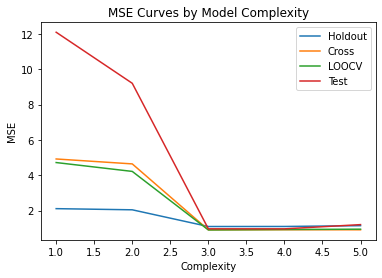

In [8]:
np.random.seed(10)
x_train = np.random.normal(0, 1, 100)
x_test = np.random.normal(0, 1, 100)
error_train = np.random.normal(0, 1, 100)
error_test = np.random.normal(0, 1, 100)
y_train = 0.5 + 0.5*x_train - x_train**2 + x_train**3 + error_train
y_test = 0.5 + 0.5*x_test - x_test**2 + x_test**3 + error_test
xp_train = x_train
xp_test = x_test
xp_train = sm.add_constant(xp_train)
xp_test = sm.add_constant(xp_test)
complexity = [1, 2, 3, 4, 5]
hold_val_mse = []
cross_val_mse = []
loocv_val_mse = []
test_mse = []

for degree in range(1, 6):
    if degree != 1:
        new_col = x_train**degree
        new_col = new_col[:,None]
        new_col2 = x_test**degree
        new_col2 = new_col2[:,None]
        xp_train = np.concatenate((xp_train, new_col), axis=1)
        xp_test = np.concatenate((xp_test, new_col2), axis=1)
    hold_val_mse.append(holdoutval(xp_train, y_train, 0.2))
    cross_val_mse.append(crossval(xp_train, y_train, 10))
    loocv_val_mse.append(crossval(xp_train, y_train, y_train.shape[0]))
    results = sm.OLS(y_train, xp_train).fit()
    test_pred = results.predict(xp_test)
    test_mse.append(np.mean((y_test - test_pred)**2))
plt.plot(complexity, hold_val_mse, label = 'Holdout')
plt.plot(complexity, cross_val_mse, label = 'Cross')
plt.plot(complexity, loocv_val_mse, label = 'LOOCV')
plt.plot(complexity, test_mse, label = 'Test')
plt.title('MSE Curves by Model Complexity')
plt.xlabel('Complexity')
plt.ylabel('MSE')
plt.legend()
plt.show()

### Problem 2

#### (a)

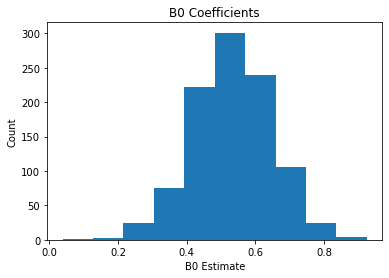

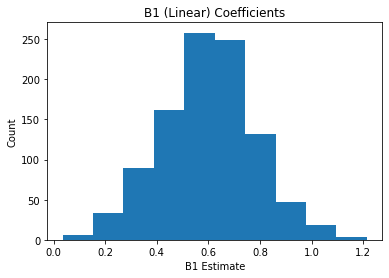

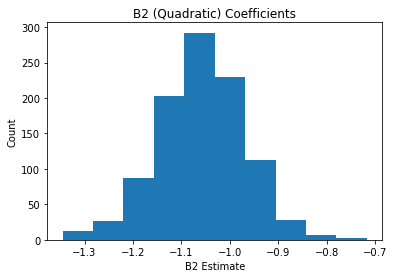

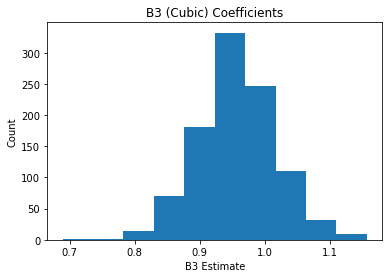

In [13]:
np.random.seed(1)
b0 = []
b1 = []
b2 = []
b3 = []
data = np.concatenate((x_train[:,None], y_train[:,None]), axis=1)
for j in range(1000):
    sample = np.zeros(shape=(data.shape[0], data.shape[1]))
    for i in range(100):
        idx = np.random.randint(0, data.shape[0])
        sample[i] = data[idx,:]
    sample_x = sample[:,0]
    sample_y = sample[:,1]
    new_col = sample_x**2
    new_col = new_col[:,None]
    new_col2 = sample_x**3
    new_col2 = new_col2[:,None]
    sample_x = np.concatenate((sample_x[:,None], new_col, new_col2), axis=1)
    sample_x = sm.add_constant(sample_x)
    results = sm.OLS(sample_y, sample_x).fit()
    b0.append(results.params[0])
    b1.append(results.params[1])
    b2.append(results.params[2])
    b3.append(results.params[3])
plt.hist(b0)
plt.title('B0 Coefficients')
plt.xlabel('B0 Estimate')
plt.ylabel('Count')
plt.show()

plt.hist(b1)
plt.title('B1 (Linear) Coefficients')
plt.xlabel('B1 Estimate')
plt.ylabel('Count')
plt.show()

plt.hist(b2)
plt.title('B2 (Quadratic) Coefficients')
plt.xlabel('B2 Estimate')
plt.ylabel('Count')
plt.show()

plt.hist(b3)
plt.title('B3 (Cubic) Coefficients')
plt.xlabel('B3 Estimate')
plt.ylabel('Count')
plt.show()

#### (b)

In [14]:
split = int(len(b0)*0.05)
b0.sort()
lower_b0 = b0[split-1]
upper_b0 = b0[len(b0)-split]

b1.sort()
lower_b1 = b1[split-1]
upper_b1 = b1[len(b1)-split]

b2.sort()
lower_b2 = b2[split-1]
upper_b2 = b2[len(b2)-split]

b0.sort()
lower_b3 = b3[split-1]
upper_b3 = b3[len(b3)-split]

print(lower_b1)
print(upper_b1)
print(lower_b2)
print(upper_b2)
print(lower_b3)
print(upper_b3)

0.2862396027611706
0.9043769582807093
-1.2037592131259405
-0.9193956240495526
0.9174213817922109
1.0161343657466866


#### (c)

In [15]:
train = x_train
new_col = train**2
new_col = new_col[:,None]
new_col2 = train**3
new_col2 = new_col2[:,None]
train = np.concatenate((train[:,None], new_col, new_col2), axis=1)
train= sm.add_constant(train)
results = sm.OLS(y_train, train).fit()
results.conf_int()

array([[ 0.30574131,  0.75677165],
       [ 0.23100845,  0.95360049],
       [-1.19681851, -0.91513039],
       [ 0.85178063,  1.06509115]])

### Problem 3

#### (a)

In [16]:
np.random.seed(1)
y_train2 = y_train.copy()
B = 1000
Tnull = np.empty(B)
corr_matrix = np.corrcoef(x_train, y_train)
corr = corr_matrix[0,1]
observedT = corr**2
for b in range(B):
    np.random.shuffle(y_train2)
    corr_matrix = np.corrcoef(x_train, y_train2)
    corr = corr_matrix[0,1]
    Tnull[b] = corr**2
(np.abs(Tnull) > np.abs(observedT)).mean()

0.0

#### (b)

In [17]:
np.random.seed(1)
y_train2 = y_train.copy()
B = 1000
Tnull = np.empty(B)
observedT, pval = sc.stats.kendalltau(x_train, y_train)
for b in range(B):
    np.random.shuffle(y_train2)
    value, pval = sc.stats.kendalltau(x_train, y_train2)
    Tnull[b] = value
(np.abs(Tnull) > np.abs(observedT)).mean()

0.0

### Problem 4

In [18]:
heart = pd.read_csv('/Users/zach/Jupyter/DATA 558/heart.csv')
x = heart[['Age', 'Sex', 'RestBP', 'Chol']]
y = heart[['AHD']]
y.AHD.replace(('Yes', 'No'), (1, 0), inplace=True)

#### (a)

In [19]:
x['intercept'] = 1
glm = sm.GLM(y, x, family=sm.families.Binomial()) 
results = glm.fit()
print(summarize(results))

             coef  std err      z  P>|z|
Age        0.0558    0.016  3.590  0.000
Sex        1.6775    0.308  5.443  0.000
RestBP     0.0141    0.008  1.859  0.063
Chol       0.0046    0.003  1.804  0.071
intercept -7.3895    1.381 -5.352  0.000


#### (b)

In [20]:
def cv_fn(x, y, k):
    fit = LogisticRegression()
    score = np.mean(sk.model_selection.cross_val_score(fit, x, y, cv = k, scoring = 'accuracy'))
    return 1-score

#### (c)

In [21]:
cv_fn(x, y, 10)

0.3464516129032259

#### (d)

In [22]:
np.random.seed(1)
age = []
sex = []
restbp = []
chol = []
def boot_fn(x, y):
    for i in range(1000):
        xb, yb = sk.utils.resample(x, y)
        glm = sm.GLM(yb, xb, family=sm.families.Binomial()) 
        results = glm.fit()
        age.append(results.params[0])
        sex.append(results.params[1])
        restbp.append(results.params[2])
        chol.append(results.params[3])
    
    print(np.mean(age))
    print(np.sqrt(np.mean(np.square(age)) - (np.mean(age))**2))
    
    print(np.mean(sex))
    print(np.sqrt(np.mean(np.square(sex)) - (np.mean(sex))**2))
    
    print(np.mean(restbp))
    print(np.sqrt(np.mean(np.square(restbp)) - (np.mean(restbp))**2))
    
    print(np.mean(chol))
    print(np.sqrt(np.mean(np.square(chol)) - (np.mean(chol))**2))

In [506]:
boot_fn(x, y)

0.05745710835355112
0.015695280332971868
1.7301470293580155
0.3009440555652344
0.014151256456388482
0.007836587645955495
0.004966613268285248
0.0028829622380309484
